## k-nearest neighbours

## problem statement:
** Problem Statement **

- The problem that we are going to solve here is that given a set of features that describe a tumour whether it is Malignant or Benign, our machine learning model must predict whether the tumour is Malignant or Benign. To train our machine learning model with tumour data, we will be using [SCLCData](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv)



In [73]:
## importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [74]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [75]:
data.shape

(569, 32)

In [76]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [77]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [78]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [79]:
# split the dataset input and the output---->train and test 
# train --> building the model 
# test -->how well the model has learnt(genralize on unseen data)

In [80]:
## preparing input and output 
## drop the id and diagnosis columns
X=data.drop(['id','diagnosis'],axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [81]:
## acessing output column 
y=data.diagnosis
y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: object

In [82]:
# preparing training and testing data
# starting 70% of the data (569 rows) into training anfd remainin g 30& of the data into testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=2)

In [83]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [84]:
X_train


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
166,14.34,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.046030,0.2075,0.05448,...,16.77,16.90,110.40,873.2,0.1297,0.15250,0.16320,0.10870,0.3062,0.06072
384,11.34,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.025940,0.1927,0.06211,...,12.47,23.03,79.15,478.6,0.1483,0.15740,0.16240,0.08542,0.3060,0.06783
558,11.08,14.71,70.21,372.7,0.10060,0.05743,0.02363,0.025830,0.1566,0.06669,...,11.35,16.82,72.01,396.5,0.1216,0.08240,0.03938,0.04306,0.1902,0.07313
451,12.34,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.045620,0.1943,0.06937,...,15.65,39.34,101.70,768.9,0.1785,0.47060,0.44250,0.14590,0.3215,0.12050
333,12.18,14.08,77.25,461.4,0.07734,0.03212,0.01123,0.005051,0.1673,0.05649,...,12.85,16.47,81.60,513.1,0.1001,0.05332,0.04116,0.01852,0.2293,0.06037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,16.25,19.51,109.80,815.8,0.10260,0.18930,0.22360,0.091940,0.2151,0.06578,...,17.39,23.05,122.10,939.7,0.1377,0.44620,0.58970,0.17750,0.3318,0.09136
534,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.114900,0.2202,0.06113,...,22.63,33.58,148.70,1589.0,0.1275,0.38610,0.56730,0.17320,0.3305,0.08465
493,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.027880,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.1428,0.25100,0.21230,0.09861,0.2289,0.08278
527,17.95,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.055960,0.2129,0.05025,...,20.58,27.83,129.20,1261.0,0.1072,0.12020,0.22490,0.11850,0.4882,0.06111


In [85]:
# before spliting if you apply standardization ---> you are considering whole
# you are including test data also into training data

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[ 0.0654828 , -1.35518629,  0.03134589, ..., -0.04689041,
         0.3683001 , -1.22806684],
       [-0.77639967, -0.1225787 , -0.77192193, ..., -0.39868555,
         0.3648074 , -0.83648993],
       [-0.84936282, -1.05782571, -0.87563499, ..., -1.03880764,
        -1.65746674, -0.54459715],
       ...,
       [-0.88303812, -0.35998755, -0.85204535, ..., -0.1993652 ,
        -0.98162901, -0.01313199],
       [ 1.07854805,  0.213151  ,  0.91351698, ...,  0.10120204,
         3.54665843, -1.20658794],
       [-0.26846391, -0.90674734, -0.26149099, ..., -0.22037015,
         1.74267813,  0.1823811 ]])

In [87]:
# array values ,we have created  data frames

In [88]:
# scaling Data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scaling for the training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.065483,-1.355186,0.031346,-0.035592,0.240960,-0.482979,-0.357708,-0.046272,1.043490,-1.165341,...,0.125178,-1.425939,0.117536,0.004168,-0.067496,-0.603330,-0.480560,-0.046890,0.368300,-1.228067
1,-0.776400,-0.122579,-0.771922,-0.735368,0.647407,-0.311306,-0.538400,-0.554964,0.487938,-0.040111,...,-0.762720,-0.388938,-0.811034,-0.683149,0.750316,-0.570666,-0.484590,-0.398686,0.364807,-0.836490
2,-0.849363,-1.057826,-0.875635,-0.787151,0.348139,-0.852027,-0.784787,-0.557750,-0.867159,0.635322,...,-0.993986,-1.439473,-1.023193,-0.826151,-0.423640,-1.070632,-1.104405,-1.038808,-1.657467,-0.544597
3,-0.495772,1.855828,-0.430686,-0.494085,0.543011,0.675764,0.293648,-0.056654,0.547997,1.030554,...,-0.106089,2.370196,-0.140978,-0.177502,2.078160,1.517193,0.926643,0.515256,0.635492,2.064263
4,-0.540673,-1.208904,-0.589306,-0.538871,-1.270688,-1.348603,-0.942352,-1.083888,-0.465510,-0.868918,...,-0.684254,-1.498682,-0.738234,-0.623056,-1.368960,-1.264486,-1.095436,-1.409643,-0.974644,-1.247343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.601481,0.093248,0.734561,0.453131,0.487333,1.735231,1.756211,1.116199,1.328773,0.501121,...,0.253200,-0.385555,0.465193,0.119998,0.284251,1.354538,1.668284,0.992779,0.815366,0.459404
394,1.594903,1.438564,1.572400,1.506153,0.410777,1.138790,2.148854,1.697561,1.520214,-0.184636,...,1.335196,1.395787,1.255592,1.250953,-0.164226,0.953898,1.555425,0.927800,0.792663,0.089857
395,-0.883038,-0.359988,-0.852045,-0.807025,0.088542,-0.065471,-0.416287,-0.505842,-0.668211,0.250414,...,-0.938234,0.199767,-0.891856,-0.806991,0.508490,0.053292,-0.233178,-0.199365,-0.981629,-0.013132
396,1.078548,0.213151,0.913517,0.918342,-0.805780,-0.659950,-0.158337,0.205162,1.246191,-1.789158,...,0.911896,0.423069,0.676164,0.679640,-1.056784,-0.818649,-0.169695,0.101202,3.546658,-1.206588


In [89]:
# Scaling for the testing data
scaled_X_test =pd. DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
scaled_X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.820383,-0.173809,-0.864054,-0.772484,-0.839113,-1.115846,-0.895059,-0.803603,0.581700,-0.557191,...,-0.867791,-0.052852,-0.896889,-0.798979,-1.019902,-1.079349,-1.007702,-0.923140,0.358435,-0.918749
1,-0.141927,-0.792820,-0.198179,-0.230883,-1.152495,-0.871458,-0.875741,-0.842076,0.091697,-0.935263,...,-0.349774,-0.954952,-0.300309,-0.418776,-1.077035,-0.417112,-0.746220,-0.800681,0.438508,-0.516902
2,1.127255,-0.621604,1.062181,0.984540,-0.660692,0.192327,0.150940,0.302088,-0.436534,-0.788529,...,0.807410,-0.679606,0.724717,0.699342,-0.382650,-0.081638,0.551709,0.505600,-0.249256,-0.219070
3,-0.981224,0.993971,-1.003433,-0.874237,-1.236369,-0.830667,-0.999770,-1.171264,0.453118,-0.064110,...,-0.727843,0.754930,-0.758478,-0.715669,-0.641946,-0.689611,-1.066559,-1.382204,0.061024,-0.559531
4,0.574547,-1.058424,0.501265,0.422529,-0.242850,-0.490922,-0.513499,-0.165548,-0.384406,-0.662945,...,0.249706,-1.050791,0.202296,0.080185,-0.633156,-0.637230,-0.321219,-0.128562,-0.340767,-0.908518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.916888,-0.625994,-0.917171,-0.839925,0.729320,-0.615620,-0.815449,-0.720426,-0.457386,-0.048247,...,-0.857347,-0.007215,-0.877674,-0.777207,0.083204,-0.778482,-0.869224,-0.731329,-0.026197,-0.414593
167,-0.109758,-0.854282,-0.088121,-0.216093,0.195580,0.278202,-0.231850,-0.018971,-0.638096,0.250510,...,0.011585,-0.856071,0.034161,-0.163628,0.267788,0.433932,-0.114450,0.268179,-0.611011,0.960324
168,-0.694635,-0.531606,-0.732749,-0.666293,-0.553944,-0.896863,-0.839197,-0.948554,0.004817,-0.472587,...,-0.640114,-0.303858,-0.695427,-0.614186,-0.466152,-0.634876,-0.700811,-1.055439,-0.339337,-0.278182
169,2.215126,0.287157,2.328490,2.466473,-0.314523,1.496564,1.510580,1.555440,-0.433059,-0.241249,...,2.438746,0.257482,2.604231,2.664237,-0.343096,1.130187,1.220513,0.983564,-0.262125,0.140716


In [90]:
#fir transform ---> fit and transform 
 #fir --->it will find parameterss -->mean and variance of the X_train columns
#transform -->whatever the mean and variance is caluculated 

In [91]:
# model Building :
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6,metric='euclidean')
## apply the knn object on the dataset(Training phase) 

## syntax objectname.fit(input,output)
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [92]:
# prediction on the data
# predict function ----> gives the predicted values
# syntax:object nam.predict(input)
y_train_pred=knn.predict(scaled_X_train)
y_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

In [93]:
# chect the accuracy , classification report 
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.98       257
           M       1.00      0.94      0.97       141

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.98      0.98      0.98       398



In [94]:
# checking for the optimum k-values 
# build the models with multiple k values -->error
from sklearn.metrics import accuracy_score
scores=[]
for k in range(1,20):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    pred_test=knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test,pred_test))
scores

[0.9473684210526315,
 0.9239766081871345,
 0.935672514619883,
 0.9298245614035088,
 0.9473684210526315,
 0.935672514619883,
 0.9473684210526315,
 0.9415204678362573,
 0.9473684210526315,
 0.9298245614035088,
 0.9415204678362573,
 0.9298245614035088,
 0.935672514619883,
 0.9239766081871345,
 0.9239766081871345,
 0.9239766081871345,
 0.9473684210526315,
 0.9239766081871345,
 0.935672514619883]

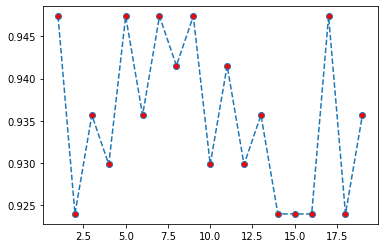

In [95]:
#plot of k values and scores
plt.plot(range(1,20),scores,marker='o',markerfacecolor='r',linestyle='--')

In [96]:
# optimum k values is 7
final_model=KNeighborsClassifier(n_neighbors=7,metric='euclidean')

final_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [97]:
# prediction on trainoiing data 
final_train_pred=final_model.predict(scaled_X_train)
final_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

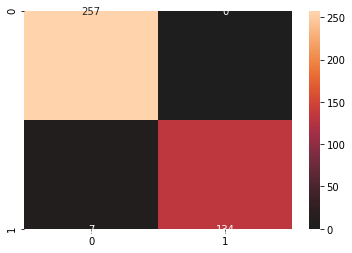

In [98]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,final_train_pred),annot=True,fmt='d',center=0)

In [99]:
# classification report
# Precision-->ppv-->out of the positive predicted values,how many truly positive
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99       257
           M       1.00      0.95      0.97       141

    accuracy                           0.98       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [100]:
# prediction on test data
final_test_pred=final_model.predict(scaled_X_test)
final_test_pred

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

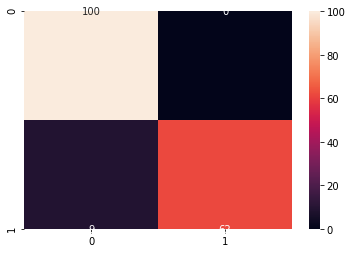

In [101]:
# compare actual alues of tst data(y_test)and final_test_pred(model preddicted values)
# confusion_matrix(actualvalues,predicted values)
sns.heatmap(confusion_matrix(y_test,final_test_pred),annot=True,fmt='d')

In [102]:
# classification report of test data
print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

           B       0.92      1.00      0.96       100
           M       1.00      0.87      0.93        71

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [103]:
 ## http://tiny.cc/kFold


In [104]:
# predict the prob of a tumor being bening an bening or malingnent
# predict -->givre you the predicted value()
# predict_proba-->gives you the probability associated with b and probability a
#syntax: objectname.predict_proba(input values)

In [105]:
y_test_prob=final_model.predict_proba(scaled_X_test)
y_test_prob=pd.DataFrame(y_test_prob)
y_test_prob

,0,1
0,1.000000,0.000000
1,1.000000,0.000000
2,0.428571,0.571429
3,1.000000,0.000000
4,1.000000,0.000000
...,...,...
166,1.000000,0.000000
167,0.857143,0.142857
168,1.000000,0.000000
169,0.000000,1.000000


In [106]:
y_test

528    B
291    B
467    M
108    B
340    B
      ..
2      B
25     M
52     B
386    M
476    B
Name: diagnosis, Length: 171, dtype: object

In [107]:
## roc curve
from sklearn.metrics import roc_auc_score,roc_curve
m_prob=final_model.predict_proba(scaled_X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,m_prob,pos_label='M')

In [108]:
tpr

array([0.        , 0.61971831, 0.73239437, 0.87323944, 0.94366197,
       0.97183099, 1.        ])

In [109]:
fpr

array([0.  , 0.  , 0.  , 0.  , 0.06, 0.16, 1.  ])

In [110]:
threshold

array([2.        , 1.        , 0.85714286, 0.57142857, 0.28571429,
       0.14285714, 0.        ])

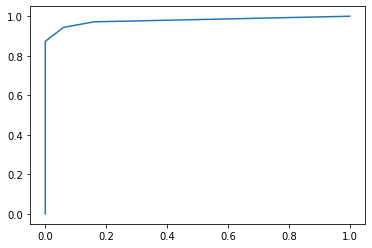

In [111]:
plt.plot(fpr,tpr)

In [112]:
roc_auc_score(y_test,m_prob)

0.9784507042253521

In [113]:
## kfold
## s folds---> in each and every folfd-->create a part of test data and remaining will be of training data
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)
kfold.get_n_splits(X,y)

5

In [119]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=6,metric='euclidean')
# model will built for 5 times-->for loop
# some set of indices will be in tesst data andthe remaining  set of indices will
## be in trqaining data
# IN each and evvery fold ,it is spliting training data and testing data
# kfold will return the indices of the records which are splitted , to acess the 
# records in that indicess we are using iloc
score=[]
for train_index,test_index in kfold.split(X,y):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    
    # pass the X_train ,y_train into the knn algorithm
    model_knn.fit(X_train,y_train)
    
    # predict the model on test data(X_test,y_test)
    y_pred_test=model_knn.predict(X_test)
    
    # accuracy score of predicted values(y_pred_test) and A.V(y_test)
    accuracy=accuracy_score(y_test,y_pred_test)
    score.append(accuracy)

print(score)

[0.9122807017543859, 0.9122807017543859, 0.9649122807017544, 0.9473684210526315, 0.9469026548672567]


In [120]:
 # http://tiny.cc/NaiveBayes
